In [163]:
import pandas as pd

In [164]:
df=pd.read_csv("gapminder_full.csv")

In [165]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


1. How many countries does the dataset have?
   142 countries

In [166]:
unique_countries=df['country'].nunique()
unique_countries

142

2. Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as    columns, and 'life_exp' as values.

In [167]:
pivot_table=df.pivot_table(values="life_exp",index="continent",columns="year",aggfunc="mean")
pivot_table

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


3. Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [168]:
data_2007=df[df['year']==2007]
gdp_75th = data_2007['gdp_cap'].quantile(0.75)
countries_high_gdp = data_2007[data_2007['gdp_cap']>gdp_75th]['country']
countries_high_gdp

71             Australia
83               Austria
95               Bahrain
119              Belgium
251               Canada
407       Czech Republic
419              Denmark
527              Finland
539               France
575              Germany
599               Greece
671     Hong Kong, China
683              Hungary
695              Iceland
755              Ireland
767               Israel
779                Italy
803                Japan
851          Korea, Rep.
863               Kuwait
1091         Netherlands
1103         New Zealand
1151              Norway
1163                Oman
1247            Portugal
1259         Puerto Rico
1319        Saudi Arabia
1367           Singapore
1379     Slovak Republic
1391            Slovenia
1427               Spain
1475              Sweden
1487         Switzerland
1511              Taiwan
1607      United Kingdom
1619       United States
Name: country, dtype: object

4. Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life        expectancy groups and add them as a new column 'Life_Exp_Range'.

In [169]:
bin_labels=['Low','Medium','High','Very High']
df['Life_Exp_Range']=pd.cut(df['life_exp'],bins=4,labels=bin_labels)
df.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low


5. Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.

In [170]:
top_5_countries_2007=data_2007.sort_values(by="gdp_cap",ascending=False).head(5)
top_5_countries_2007

,country,year,population,continent,life_exp,gdp_cap
1151,Norway,2007,4627926,Europe,80.196,49357.19017
863,Kuwait,2007,2505559,Asia,77.588,47306.98978
1367,Singapore,2007,4553009,Asia,79.972,47143.17964
1619,United States,2007,301139947,Americas,78.242,42951.65309
755,Ireland,2007,4109086,Europe,78.885,40675.99635


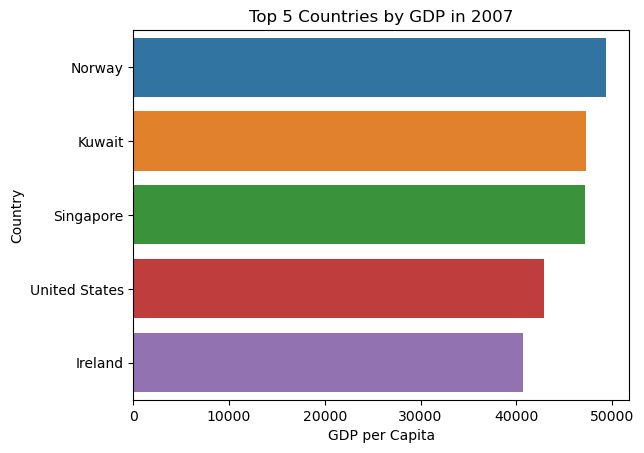

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="gdp_cap",y="country",data=top_5_countries_2007)
plt.title('Top 5 Countries by GDP in 2007')
plt.xlabel('GDP per Capita')
plt.ylabel('Country')
plt.show()

6. Find all country names that start with "I" and end with "a" using regex.

In [172]:
import re
countries_regex = df[df['country'].str.contains(r'^I.*a$')]['country'].unique()
countries_regex

array(['India', 'Indonesia'], dtype=object)

7. Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

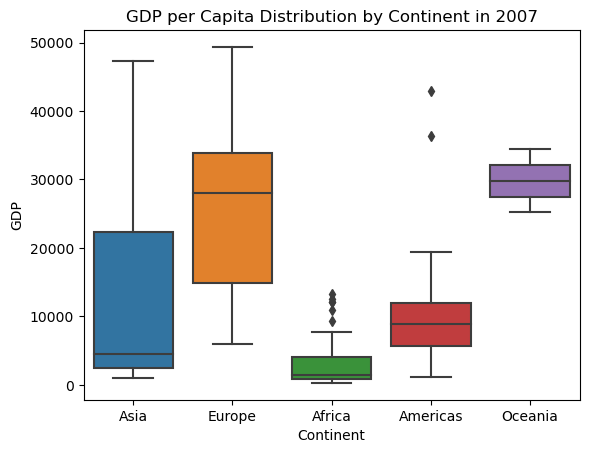

In [173]:
sns.boxplot(x="continent",y="gdp_cap",data=data_2007)
plt.title('GDP per Capita Distribution by Continent in 2007')
plt.xlabel('Continent')
plt.ylabel('GDP')
plt.show()

8. Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.

In [174]:
life_Expectancy_80=data_2007[data_2007['life_exp']>80][['country','continent']].reset_index()
life_Expectancy_80

,index,country,continent
0,71,Australia,Oceania
1,251,Canada,Americas
2,539,France,Europe
3,671,"Hong Kong, China",Asia
4,695,Iceland,Europe
5,767,Israel,Asia
6,779,Italy,Europe
7,803,Japan,Asia
8,1103,New Zealand,Oceania
9,1151,Norway,Europe


9. Convert the 'year' column to a datetime type and extract the decade. 
   Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).

In [175]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['Decade'] = (df['year'].dt.year // 10 * 10).astype(str)+'s'
df.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,Decade
0,Afghanistan,1952-01-01,8425333,Asia,28.801,779.445314,Low,1950s
1,Afghanistan,1957-01-01,9240934,Asia,30.332,820.853030,Low,1950s
2,Afghanistan,1962-01-01,10267083,Asia,31.997,853.100710,Low,1960s
3,Afghanistan,1967-01-01,11537966,Asia,34.020,836.197138,Low,1960s
4,Afghanistan,1972-01-01,13079460,Asia,36.088,739.981106,Low,1970s


10. Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn       to visualize this correlation matrix as a heatmap.

In [176]:
correlation=df[['gdp_cap','life_exp','population']].corr()
correlation

,gdp_cap,life_exp,population
gdp_cap,1.000000,0.583706,-0.025600
life_exp,0.583706,1.000000,0.064955
population,-0.025600,0.064955,1.000000


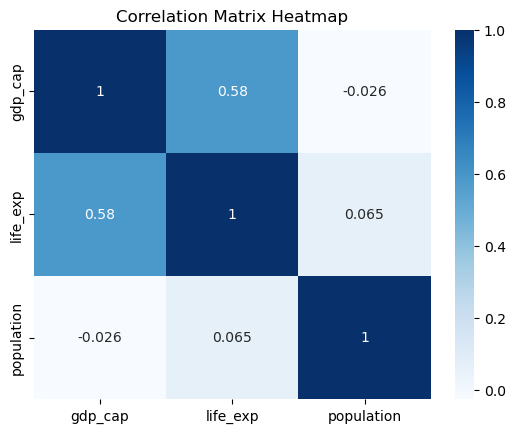

In [177]:
sns.heatmap(data=correlation, annot=True, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

11. How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.
    Subjective Question: Discuss the various reasons that could have contributed to the change.

In [178]:
global_avg_exp = df.groupby('year')['life_exp'].mean()
global_avg_exp

year
1952-01-01    49.057620
1957-01-01    51.507401
1962-01-01    53.609249
1967-01-01    55.678290
1972-01-01    57.647386
1977-01-01    59.570157
1982-01-01    61.533197
1987-01-01    63.212613
1992-01-01    64.160338
1997-01-01    65.014676
2002-01-01    65.694923
2007-01-01    67.007423
Name: life_exp, dtype: float64

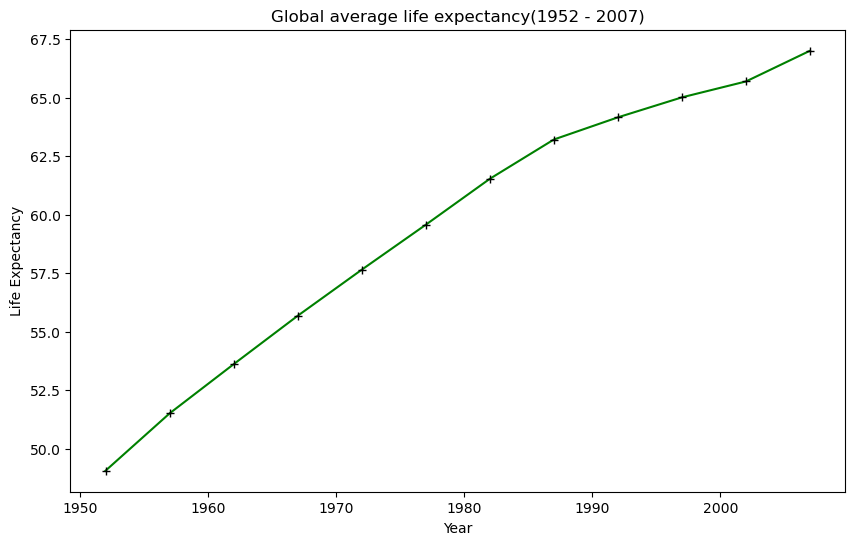

In [179]:
plt.figure(figsize=(10,6))
plt.plot(global_avg_exp.index,global_avg_exp.values,color='green',marker='+', markeredgecolor='black')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Global average life expectancy(1952 - 2007)')
plt.show()

11. Subjective Question: Discuss the various reasons that could have contributed to the change.

Global Life Expectancy Growth: The global average life expectancy increased from about 49.1 years in 1952 to 67 years in 2007. This represents a significant improvement of nearly 18 years over 55 years.

Contributing Factors:
  
● Advancements in Healthcare and Medicine: The period from 1952 to 2007 saw significant medical advancements, including the     development and widespread use of vaccines, antibiotics, and improved surgical techniques. These innovations greatly reduced mortality from infectious diseases and other health conditions, contributing to the increase in global life expectancy.

● Economic Growth and Improved Living Standards: As countries experienced economic growth, there was better access to healthcare, improved nutrition, and enhanced public health infrastructure. Higher incomes and better living conditions played a crucial role in increasing life expectancy, particularly in developing countries.

● Global Public Health Initiatives: International efforts by organizations like the WHO and various non-profits helped control and eradicate diseases, improve sanitation, and provide healthcare access in underdeveloped regions. These global initiatives significantly contributed to the overall improvement in life expectancy worldwide.

The significant increase in global average life expectancy from 1952 to 2007 can be attributed to a combination of factors including advancements in healthcare, improvements in living conditions, economic growth, global health initiatives, and better education.

12. For the year 2007, analyze the relationship between life expectancy and GDP per capita. Subjective Question: Is there a         noticeable trend or correlation? Represent this using a scatter plot.

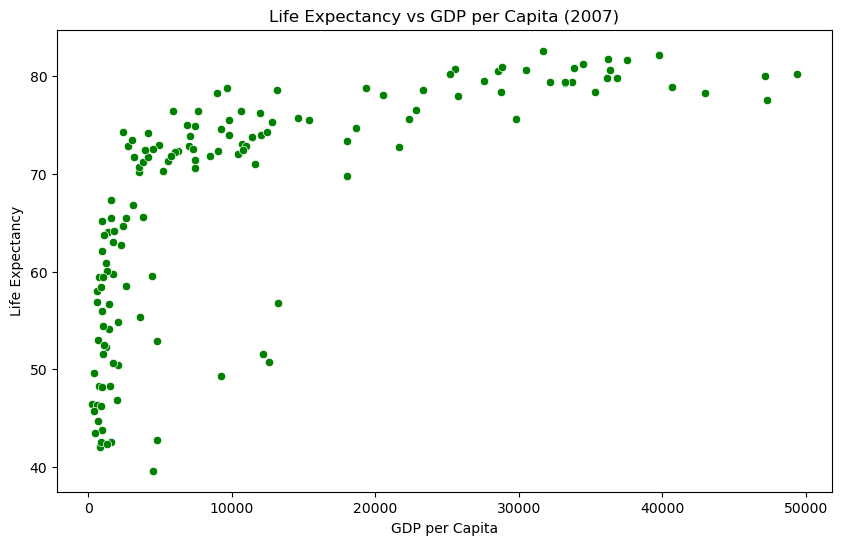

In [180]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_cap',y="life_exp",data=data_2007,color='green')
plt.title('Life Expectancy vs GDP per Capita (2007)')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

12. Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot.

Key Observations:

● There is a strong positive correlation between GDP per capita and life expectancy, indicating that wealthier countries tend to have higher life expectancy rates.

● The relationship between GDP per capita and life expectancy is non-linear, with life expectancy increasing rapidly at lower income levels but plateauing as GDP per capita rises, suggesting diminishing returns in terms of health outcomes as wealth increases.

● Countries with lower GDP per capita show more variability in life expectancy, reflecting the influence of factors beyond economic prosperity, such as healthcare access, education, and political stability.

● In wealthier nations, higher GDP per capita consistently correlates with longer life expectancy, emphasizing the role of economic prosperity in supporting better healthcare, nutrition, and living conditions, but with limited additional gains in life expectancy beyond a certain economic threshold.

A common trend is that countries with higher GDP per capita tend to have higher life expectancy. This correlation suggests that wealthier nations can afford better healthcare, nutrition, and living conditions, contributing to longer lifespans.

13. Compare the average GDP per capita for each continent in the year 2007. Use a bar chart for this comparison.

In [181]:
avg_gdp_continent=data_2007.groupby('continent')['gdp_cap'].mean().sort_values(ascending=False)
avg_gdp_continent

continent
Oceania     29810.188275
Europe      25054.481636
Asia        12473.026870
Americas    11003.031625
Africa       3089.032605
Name: gdp_cap, dtype: float64

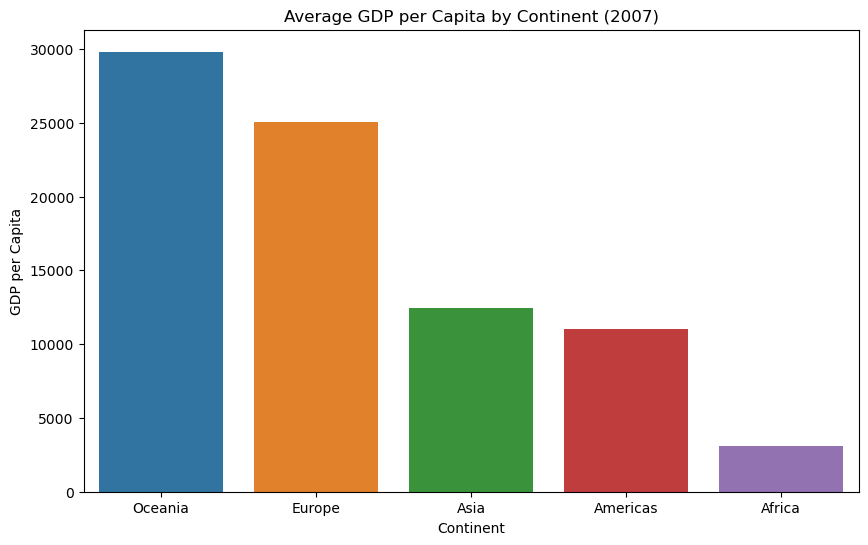

In [182]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_gdp_continent.index,y=avg_gdp_continent.values)
plt.title('Average GDP per Capita by Continent (2007)')
plt.xlabel('Continent')
plt.ylabel('GDP per Capita')
plt.show()

13. Subjective Question:  Why is the average GDP per capita for Oceania higher than the Americas even though the Americas have     more countries?

Key Factors:

● Economic Composition:
   Oceania is dominated by a few high-income countries, such as Australia and New Zealand, which significantly raise the average GDP per capita. In contrast, the Americas include both high-income countries (e.g., the United States and Canada) and many lower-income countries, which bring down the overall average.

● Population Size and Distribution:
   Oceania has a smaller and more concentrated population, with high GDP output from a few wealthy countries influencing the average. The Americas have a larger and more diverse population with varying economic conditions, where the presence of lower-income nations affects the average GDP per capita.

● Economic Disparities:
   Oceania benefits from the high economic output of its wealthier nations, leading to a higher average GDP per capita. The Americas experience greater economic disparities, with the average being lowered by the significant number of lower-income countries.

14. Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and     Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.

In [183]:
afg_swi_2007=data_2007[data_2007['country'].isin(['Afghanistan','Switzerland'])]

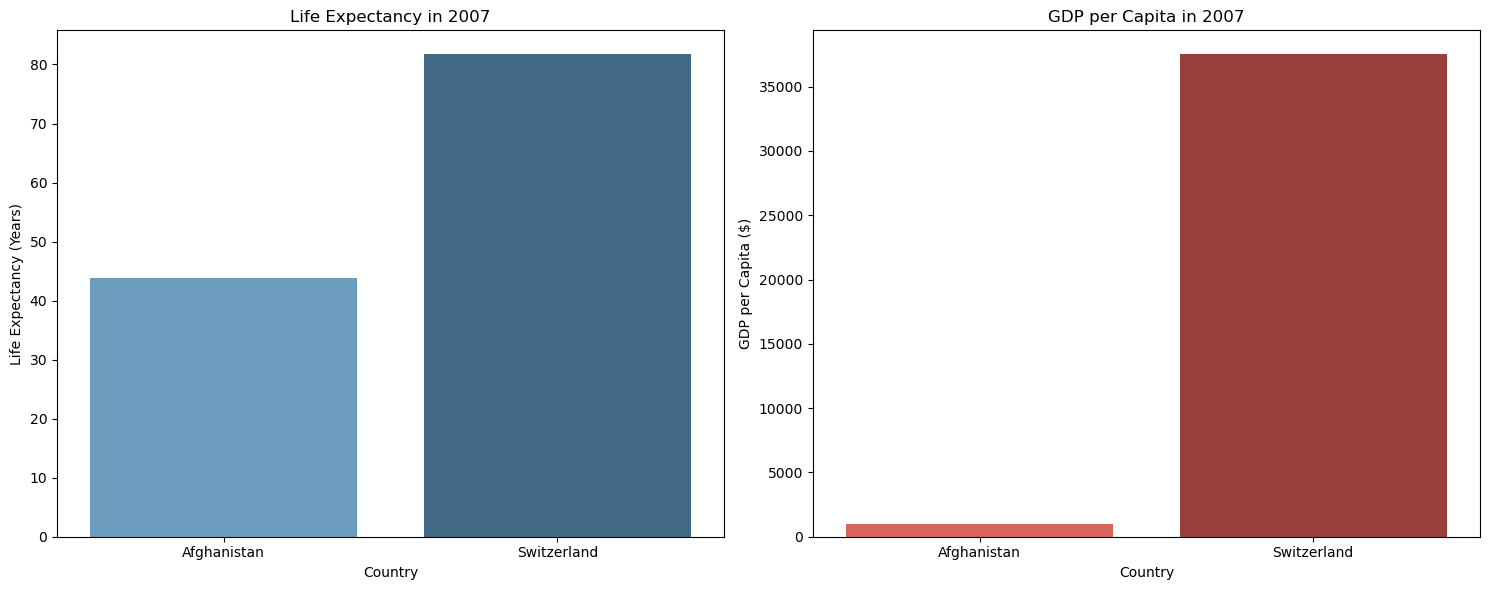

In [184]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x="country", y="life_exp", data=afg_swi_2007, ax=ax1, palette="Blues_d")
ax1.set_title('Life Expectancy in 2007')
ax1.set_xlabel('Country')
ax1.set_ylabel('Life Expectancy (Years)')

sns.barplot(x="country", y="gdp_cap", data=afg_swi_2007, ax=ax2, palette="Reds_d")
ax2.set_title('GDP per Capita in 2007')
ax2.set_xlabel('Country')
ax2.set_ylabel('GDP per Capita ($)')
plt.tight_layout()

plt.show()

In [185]:
afg_swi_data=df[df['country'].isin(['Afghanistan','Switzerland'])]

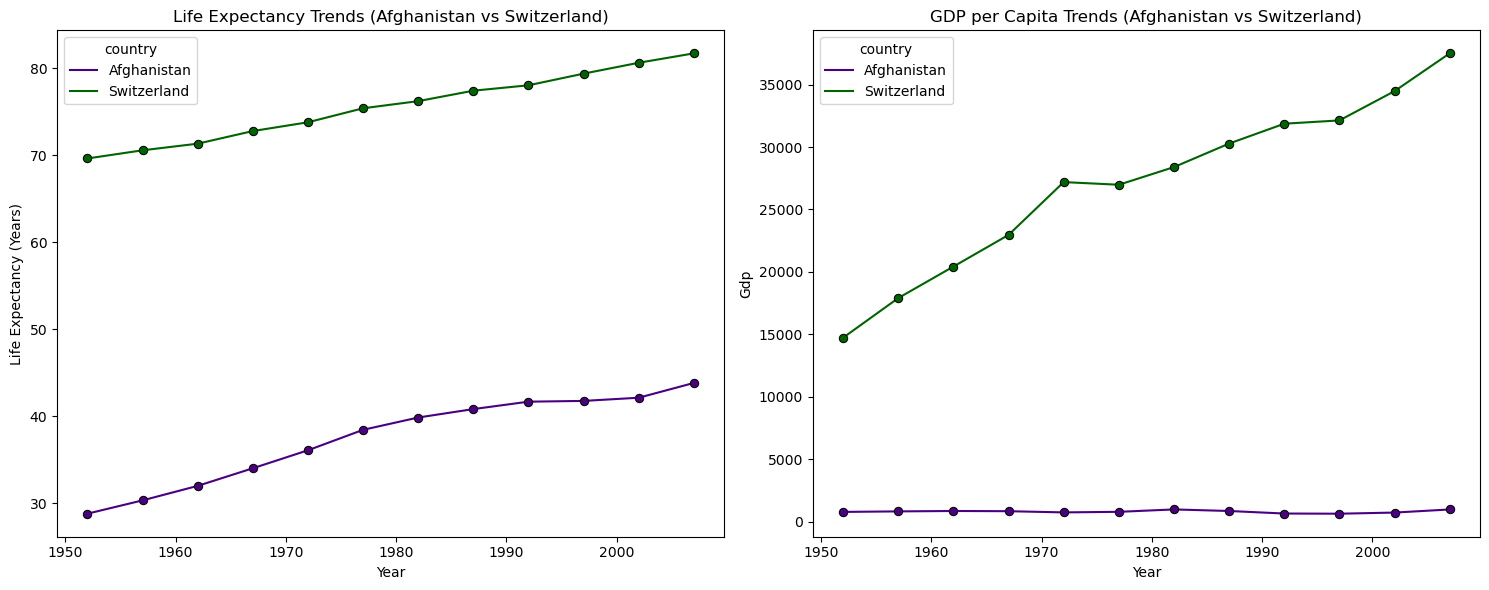

In [186]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.lineplot(x='year', y='life_exp', hue='country', data=afg_swi_data,ax=ax1,marker="o",markeredgecolor="black", palette={'Afghanistan': '#4B0082', 'Switzerland': '#006400'})
ax1.set_title('Life Expectancy Trends (Afghanistan vs Switzerland)')
ax1.set_xlabel("Year")
ax1.set_ylabel("Life Expectancy (Years)")

sns.lineplot(x='year', y='gdp_cap', hue='country', data=afg_swi_data,ax=ax2,marker="o",markeredgecolor="black", palette={'Afghanistan': '#4B0082', 'Switzerland': '#006400'})
ax2.set_title('GDP per Capita Trends (Afghanistan vs Switzerland)')
ax2.set_xlabel("Year")
ax2.set_ylabel("Gdp")
plt.tight_layout()
plt.show()

14. Subjective Question: What differences do you observe in terms of life expectancy and economic development? How might the    stability or instability of a country influence these key metrics over time? Analyze the data through these visualizations and discuss your inferences.

Visualizations:

– The bar chart shows Switzerland with a much higher life expectancy compared to Afghanistan.

– Switzerland’s bar is significantly taller, indicating its higher GDP per capita.

– Afghanistan's trend shows a gradual increase, reflecting improvements in healthcare over time, but starting from a lowerbase.

– Switzerland's trend likely shows a steady increase, reflecting consistent high standards of living and healthcare.

– Afghanistan: The trend shows slower growth, reflecting ongoing economic challenges and instability.

– Switzerland: The trend shows steady and significant growth, reflecting robust economic development and stability.


Key Factors:

● Switzerland exhibits a much higher life expectancy (81.70 years) and GDP per capita (37,506.42) compared to Afghanistan (43.83 years and 974.58). This stark contrast underscores the differences in health outcomes and economic prosperity between a developed and a developing country.

● Switzerland shows steady improvements in both life expectancy and GDP per capita over time, reflecting ongoing economic stability and advancements in healthcare. Conversely, Afghanistan demonstrates slower and less consistent growth, highlighting the impacts of ongoing conflicts and economic challenges on its development.

● Stable countries like Switzerland benefit from consistent investments in healthcare, education, and infrastructure, leading to higher life expectancy and economic prosperity. Countries facing instability like Afghanistan experience disruptions in healthcare services, economic stagnation, and lower standards of living, which negatively affect life expectancy and GDP per capita.